## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())


248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_regimen = clean_study_data_complete.groupby(['Drug Regimen'])

#Mean
regimen_mean = summary_regimen['Tumor Volume (mm3)'].mean()
#Median
regimen_median = summary_regimen['Tumor Volume (mm3)'].median()
#Variance
regimen_var = summary_regimen['Tumor Volume (mm3)'].var()
#Stabdard Deviation
regimen_std = summary_regimen['Tumor Volume (mm3)'].std()
#SEM
regimen_sem = summary_regimen['Tumor Volume (mm3)'].sem()
#Dataframe formatting
summary_regimen_s = pd.DataFrame({
            "Mean": regimen_mean, 
            "Median": regimen_median,
            "Variance": regimen_var,
            "Standard Deviation": regimen_std,
            "SEM": regimen_sem
})
summary_regimen_s


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_regimen_gb = clean_study_data_complete.groupby(['Drug Regimen'])
summary_stats = summary_regimen_gb.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

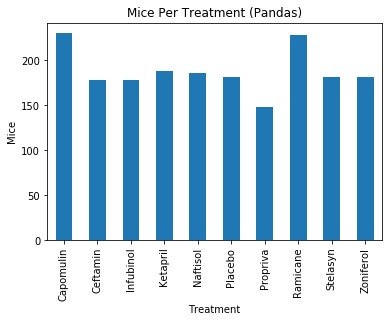

In [22]:
mice_per_regimen = summary_regimen_groupby['Mouse ID'].count()
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_regimen.plot(kind = 'bar')
plt.title("Mice Per Treatment (Pandas)")
plt.xlabel("Treatment")
plt.ylabel("Mice")

plt.show()

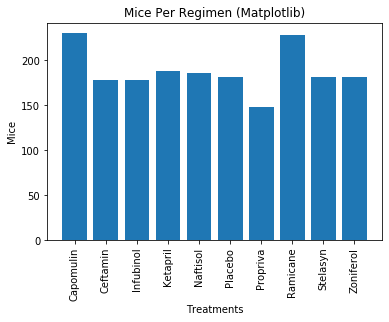

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'] 
mice_qty = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

x_axis = np.arange(0, len(treatments))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Mice Per Regimen (Matplotlib)")
plt.xlabel("Treatments")
plt.ylabel("Mice")

plt.bar(x_axis, mice_qty, align = 'center')
plt.xticks(tick_locations, regimens, rotation = 'vertical')

plt.show()

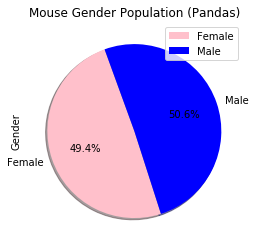

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = study_data_complete.groupby("Sex").count()
mice_per_gender = gender_group[["Mouse ID"]]
mice_per_gender_p = mice_per_gender.rename(columns={"Mouse ID": "Gender"})
colors = ["pink", "blue"]
mice_per_gender_p.plot.pie(y = "Gender", colors = colors, startangle = 110, shadow = True, autopct = "%1.1f%%")
plt.title("Mouse Gender Population (Pandas)")
plt.show()



C:\Users\osafi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


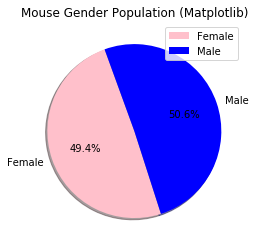

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
percents = mice_per_gender_p
plt.pie(percents, labels = labels, colors = colors, shadow = True, startangle = 110, autopct = "%1.1f%%")
plt.legend(labels, loc = "upper right")
plt.title("Mouse Gender Population (Matplotlib)")
plt.show()



## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study_data_complete[clean_study_data_complete["Drug Regimen"].isin(regimens)]
new_last_time = last_timepoint.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_time = pd.merge(new_last_time, clean_study_data_complete, on = ['Mouse ID', 'Timepoint'], how = 'left')
merged_time

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [96]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
iqr_lst = []
lower_bound_lst = []
upper_bound_lst = []
volume_lst = []
for regimen in regimens:
    drug_df = merged_time.loc[merged_time['Drug Regimen'] == regimen,:]
    volume_df = drug_df['Tumor Volume (mm3)']
    volume_lst.append(volume_df)
    quartiles = volume_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
           
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
    iqr = round(upperq - lowerq, 3) 
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    lower_bound_lst.append(lower_bound)
    iqr_lst.append(iqr)
    upper_bound_lst.append(upper_bound)
    

# Determine outliers using upper and lower bounds
for i in range(len(iqr_lst)):
    print(f"The IQR is {iqr_lst[i]} for {regimens[i]}.")
    print(f"Values below {lower_bound_lst[i]} could be outliers for {regimens[i]}.")
    print(f"Values above {upper_bound_lst[i]} could be outliers for {regimens[i]}.")
    
    

The IQR is 7.782 for Capomulin.
Values below 20.704 could be outliers for Capomulin.
Values above 51.832 could be outliers for Capomulin.
The IQR is 9.099 for Ramicane.
Values below 17.912 could be outliers for Ramicane.
Values above 54.308 could be outliers for Ramicane.
The IQR is 11.477 for Infubinol.
Values below 36.833 could be outliers for Infubinol.
Values above 82.741 could be outliers for Infubinol.
The IQR is 15.578 for Ceftamin.
Values below 25.355 could be outliers for Ceftamin.
Values above 87.667 could be outliers for Ceftamin.


In [100]:
print(regimens)

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


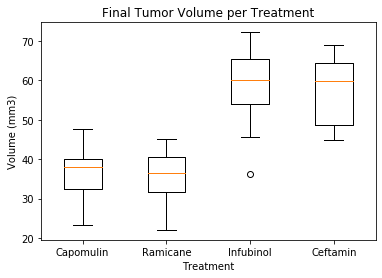

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
plt.title('Final Tumor Volume per Treatment')
plt.ylabel('Volume (mm3)')
plt.xlabel('Treatment')
plt.boxplot(volume_lst, labels=regimens)

plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

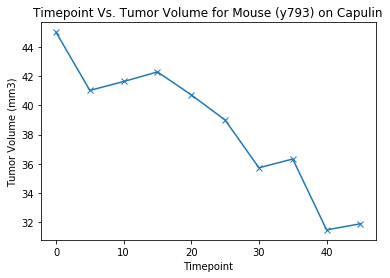

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = study_data_complete.loc[study_data_complete['Drug Regimen'] == "Capomulin"]
mouse = capo_df.loc[capo_df['Mouse ID'] == 'y793']
time_volume = mouse[['Timepoint', 'Tumor Volume (mm3)']]
time_volume.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)', title = "Timepoint Vs. Tumor Volume for Mouse (y793) on Capulin", legend = False, marker = 'x')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')


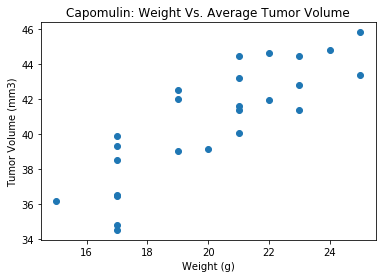

In [75]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = capo_df.groupby(['Mouse ID']).mean()
weight = weight_df['Weight (g)']
tumor_vol = weight_df['Tumor Volume (mm3)']
plt.scatter(weight, tumor_vol)
plt.title("Capomulin: Weight Vs. Average Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight['Weight (g)'], weight['Tumor Volume (mm3)']) [0], 2)}")


The correlation coefficient between mouse weight and average tumor volume is 0.84


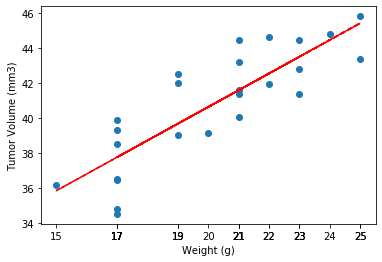

In [104]:
weight_slope, weight_int, weight_r, weight_p, weight_std_err = st.linregress(weight, tumor_vol)
weight_fit = weight_slope * weight + weight_int
plt.scatter(weight, tumor_vol)
plt.plot(weight, weight_fit, "--", color='red')
plt.xticks(weight)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()                                                                                 